# AMAZON SENTIMENT ANALYSIS

In [1]:
import pandas as pd

df = pd.read_csv("Reviews_new.csv", low_memory=False)

In [2]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ConvertedDate,Summary,...,ReviewLength,SummaryLength,UserReviewCount,FiveStarFrequency,IsPerfect,ReviewYear,ReviewMonth,ReviewDay,AverageScorePerUser,DailyReviewRate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,4/27/2011,Good Quality Dog Food,...,263,21,1,1,1,2011,4,27,5.000000,1.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,9/7/2012,Not as Advertised,...,190,17,1,0,0,2012,9,7,1.000000,1.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,8/18/2008,"""Delight"" says it all",...,509,21,3,1,0,2008,8,18,4.333333,0.001585
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,6/13/2011,Cough Medicine,...,219,14,3,0,0,2011,6,13,2.000000,3.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,10/21/2012,Great taffy,...,140,11,2,2,1,2012,10,21,5.000000,0.004914


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ConvertedDate', 'Summary',
       'Text', 'CleanedText', 'InvalidHelpfulness', 'ReviewLength',
       'SummaryLength', 'UserReviewCount', 'FiveStarFrequency', 'IsPerfect',
       'ReviewYear', 'ReviewMonth', 'ReviewDay', 'AverageScorePerUser',
       'DailyReviewRate'],
      dtype='object')

In [4]:
!pip install textblob

In [5]:
!pip install tqdm

In [6]:
#This part of code is edited after professor's feedback
from textblob import TextBlob
from tqdm import tqdm

tqdm.pandas()

# Defining Polarity Function 
def get_sentiment(text):
    text_str = str(text) 
    if not text_str or text_str.lower() == 'nan':
        return 0 
    return TextBlob(text_str).sentiment.polarity

# Defining Subjectivity Function
def get_subjectivity(text):
    text_str = str(text) 
    if not text_str or text_str.lower() == 'nan':
        return 0 
    return TextBlob(text_str).sentiment.subjectivity

print("----Sentiment & Linguistic Analysis----")

# Calculating Polarity
df['SummarySentiment'] = df['Summary'].progress_apply(get_sentiment)
df['TextSentiment'] = df['CleanedText'].progress_apply(get_sentiment)
print("Polarity calculated.")

# Calculating Subjectivity
df['Subjectivity'] = df['CleanedText'].progress_apply(get_subjectivity)
print("Subjectivity calculated.")

print("\nSample Results:")
print(df[['Score', 'TextSentiment', 'Subjectivity']].head())

----Sentiment & Linguistic Analysis----


100%|██████████| 567244/567244 [05:54<00:00, 1601.95it/s]


Polarity calculated.


100%|██████████| 567244/567244 [06:05<00:00, 1550.01it/s]

Subjectivity calculated.

Sample Results:
   Score  TextSentiment  Subjectivity
0      5       0.450000      0.433333
1      1      -0.033333      0.762963
2      4       0.133571      0.448571
3      2       0.166667      0.533333
4      5       0.483333      0.637500


In [7]:
# Calculating max reviews per day (Burst Frequency)

# Group by User and Date
# UPDATED NAME: 'SingleDayReviewFrequency' to match your Decision Tree code
daily_counts = df.groupby(['UserId', 'ConvertedDate']).size().reset_index(name='SingleDayReviewFrequency')

# Left merge to keep all original rows
df = df.merge(daily_counts, on=['UserId', 'ConvertedDate'], how='left')

print("\nSample of result:")
print(df[['UserId', 'ConvertedDate', 'SingleDayReviewFrequency']].head())


Sample of result:
           UserId ConvertedDate  SingleDayReviewFrequency
0  A3SGXH7AUHU8GW     4/27/2011                         1
1  A1D87F6ZCVE5NK      9/7/2012                         1
2   ABXLMWJIXXAIN     8/18/2008                         1
3  A395BORC6FGVXV     6/13/2011                         3
4  A1UQRSCLF8GW1T    10/21/2012                         1


In [9]:
df.to_csv("Reviews_With_Linguistic.csv", index=False)

C:\Users\visha\AppData\Local\Temp\ipykernel_30328\3292993063.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Reviews_With_Linguistic.csv")
C:\Users\visha\AppData\Local\Temp\ipykernel_30328\3292993063.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


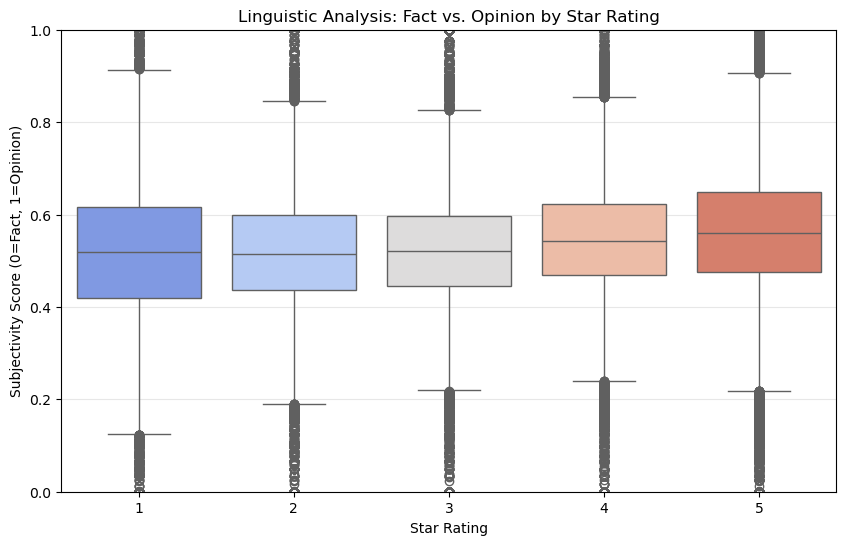

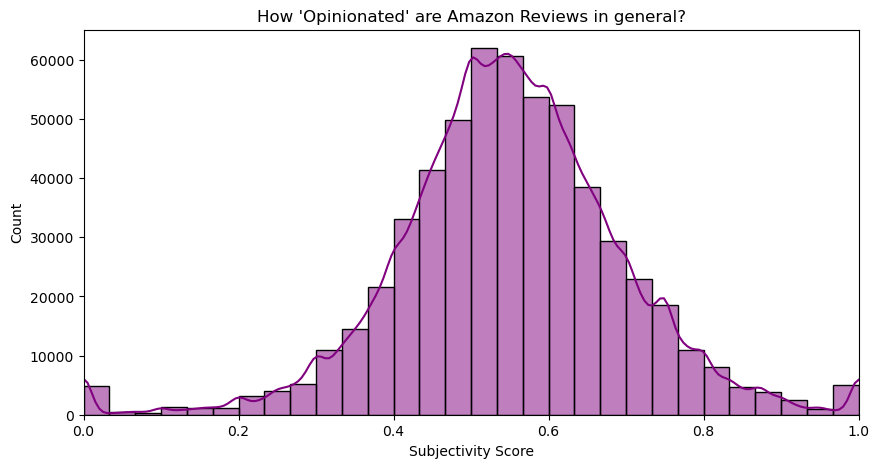

Average Subjectivity by Star Rating:
Score
1    0.515312
2    0.516126
3    0.519999
4    0.545413
5    0.561195
Name: Subjectivity, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Reviews_With_Linguistic.csv")

# Subjectivity by Star Rating (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='Score', 
    y='Subjectivity', 
    palette='coolwarm'
)

plt.title("Linguistic Analysis: Fact vs. Opinion by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Subjectivity Score (0=Fact, 1=Opinion)")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

# General Distribution (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df['Subjectivity'], bins=30, kde=True, color='purple')
plt.title("How 'Opinionated' are Amazon Reviews in general?")
plt.xlabel("Subjectivity Score")
plt.xlim(0, 1)
plt.show()

print("Average Subjectivity by Star Rating:")
print(df.groupby('Score')['Subjectivity'].mean())